In [2]:
!pip install pandas

In [3]:
!pip install seaborn

In [4]:
!pip install matplotlib

1 IMPORT & LOAD DATA

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("C:/Users/dell/Downloads/loan_dataSet.csv")

In [7]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

2 DATA UNDERSTANDING

In [8]:
#rows,columns
print(df.shape)

(614, 13)


In [9]:
# data types
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [10]:
# missing values info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [11]:
# numarical summary 
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


3 LOW_LEVEL UNDERSTANDING

In [12]:
# how many approved vs not approved
print(df['Loan_Status'].value_counts())

Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [13]:
# gender distribution
print(df['Gender'].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64


In [15]:
# married vs not
print(df['Married'].value_counts())

Married
Yes    398
No     213
Name: count, dtype: int64


In [16]:
# Education levels
print(df['Education'].value_counts())

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [17]:
#Properties area distribution
print(df['Property_Area'].value_counts())

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [18]:
# credit history counts
print(df['Credit_History'].value_counts())

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


4 DATA CLEANING

In [19]:
df=df.drop_duplicates()

In [20]:
#  check missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [22]:
#Filling missing numerical values with median
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [23]:
# filling missing categorical values with mode
for col in ['Gender','Married','Dependents','Self_Employed',]:
    df[col]=df[col].fillna(df[col].mode()[0])

5 FEATURE ENGINEERING

In [24]:
# Create new feature:Total Income
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [26]:
# Loan Amount to Income ratio
df['Loan_Income_Ratio']=df['LoanAmount']/df['TotalIncome']

6 DATA VISUALIZATION

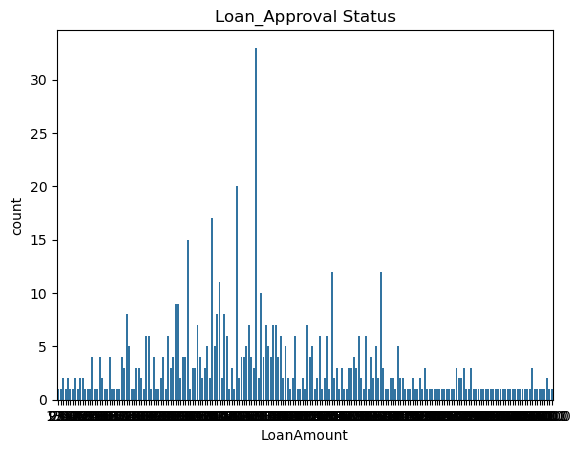

In [28]:
# Loan Status Distribution
sns.countplot(x='LoanAmount',data=df)
plt.title("Loan_Approval Status")
plt.show()

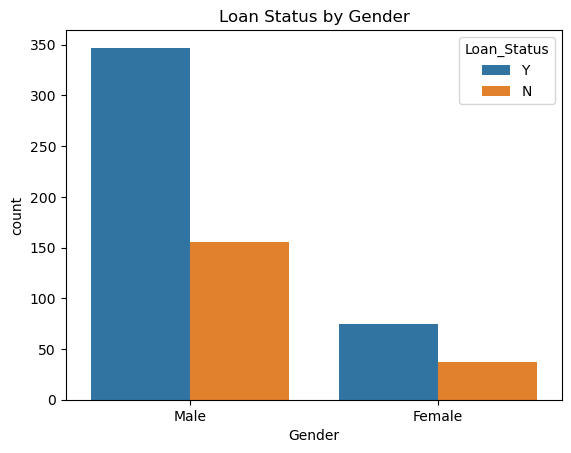

In [29]:
# Gender vs Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.title("Loan Status by Gender")
plt.show()

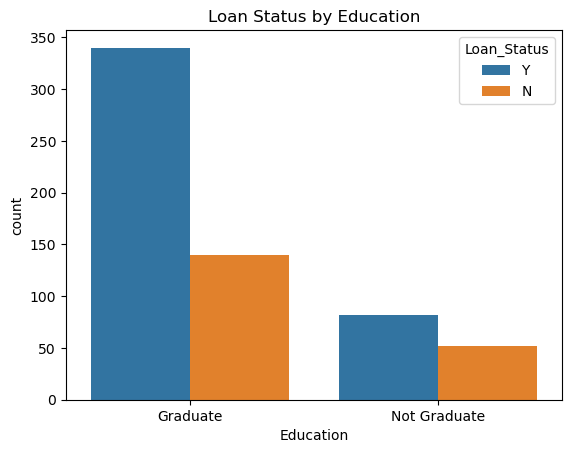

In [30]:
#Education vs Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.title("Loan Status by Education")
plt.show()

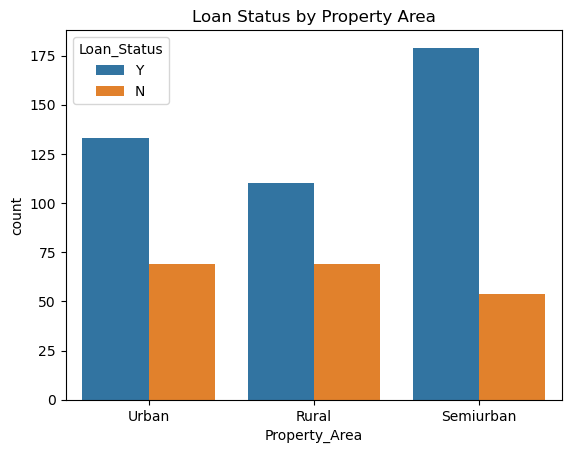

In [32]:
#Property Area vs Loan Status
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)
plt.title("Loan Status by Property Area")
plt.show()

In [33]:
#Income vs Loan Status
sns.countplot(x='TotalIncome',y='LoanAmount',hue='Loan_Status',data=df)
plt.title("Income vs LoanAmount")
plt.show()

TypeError: Cannot pass values for both `x` and `y`.